In [ ]:
!pip3 install rembg onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 6.0 MB/s eta 0:00:00


In [ ]:
import os        # File and directory operations
import random    # Random number generation
import numpy as np  # Numerical computations
import pandas as pd # Data handling with DataFrames
import matplotlib.pyplot as plt  # Plotting graphs
import cv2  # Working with images


%matplotlib inline

from tensorflow.keras import models, layers  # Keras models and layers for neural networks
import tensorflow as tf  # TensorFlow for deep learning
from tensorflow import keras  # High-level API for building models
from tensorflow.keras import backend as K
from rembg import remove

In [ ]:
BATCH_SIZE = 32
EPOCHS = 25
IMAGE_SIZE = 224
default_image_size = tuple((IMAGE_SIZE, IMAGE_SIZE))
image_size = 0
val_dir = "/content/drive/MyDrive/PlantDataSet/val_processed_leafEye"
train_dir = '/content/drive/MyDrive/PlantDataSet/train_processed_leafEye'
test_dir = "/content/drive/MyDrive/PlantDataSet/test_processed_leafEye"
CHANNELS=3
AUTOTUNE = tf.data.AUTOTUNE

In [ ]:
#import os
#import shutil
#import random

#val_dir = "/content/drive/MyDrive/PlantDataSet/val_processed_leafEye"
#test_dir = "/content/drive/MyDrive/PlantDataSet/test_processed_leafEye"

# Ensure the test directory exists
#os.makedirs(test_dir, exist_ok=True)

#for class_name in os.listdir(val_dir):
#    class_dir = os.path.join(val_dir, class_name)

#    if os.path.isdir(class_dir):  # Make sure it's a directory
#        print(f"Processing: {class_dir}")

        # Create a subdirectory in the test directory
#        test_class_dir = os.path.join(test_dir, class_name)
#        os.makedirs(test_class_dir, exist_ok=True)
#
#        # Get a list of image files in the class directory
#        image_files = [f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))]
#
#        if len(image_files) >= 16:  # Ensure there are enough images to move
#            selected_images = random.sample(image_files, 16)  # Select 16 random images
#
#            # Move selected images to the test directory
#            for image_file in selected_images:
#                source_path = os.path.join(class_dir, image_file)
#                destination_path = os.path.join(test_class_dir, image_file)
#                shutil.move(source_path, destination_path)  # Move instead of copy
#
#print("Images moved successfully!")

Processing: /content/drive/MyDrive/PlantDataSet/val_processed_leafEye/Soybean___healthy
Processing: /content/drive/MyDrive/PlantDataSet/val_processed_leafEye/Potato___healthy
Processing: /content/drive/MyDrive/PlantDataSet/val_processed_leafEye/Strawberry___Leaf_scorch
Processing: /content/drive/MyDrive/PlantDataSet/val_processed_leafEye/Apple___healthy
Processing: /content/drive/MyDrive/PlantDataSet/val_processed_leafEye/Apple___Black_rot
Processing: /content/drive/MyDrive/PlantDataSet/val_processed_leafEye/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Processing: /content/drive/MyDrive/PlantDataSet/val_processed_leafEye/Squash___Powdery_mildew
Processing: /content/drive/MyDrive/PlantDataSet/val_processed_leafEye/Tomato___Septoria_leaf_spot
Processing: /content/drive/MyDrive/PlantDataSet/val_processed_leafEye/Pepper,_bell___Bacterial_spot
Processing: /content/drive/MyDrive/PlantDataSet/val_processed_leafEye/Peach___Bacterial_spot
Processing: /content/drive/MyDrive/PlantDataSet/va

In [ ]:
def get_dataset(data_dir: str, willShuffle):
    return tf.keras.preprocessing.image_dataset_from_directory(
        data_dir,
        seed=42,
        image_size=default_image_size,
        batch_size=BATCH_SIZE,
        shuffle=willShuffle
    )

# Loading datasets
train_ds = get_dataset(train_dir,True)
val_ds = get_dataset(val_dir,False)
test_ds = get_dataset(test_dir,False)

Found 4864 files belonging to 38 classes.
Found 607 files belonging to 38 classes.
Found 608 files belonging to 38 classes.


In [ ]:
class_names = train_ds.class_names
n_classes = len(class_names)
print("Number of train classes : ", n_classes,"\n", class_names)

Number of train classes :  38 
 ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_s

In [ ]:
test = cv2.imread("/content/drive/MyDrive/PlantDataSet/test_processed_leafEye/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG_processed.jpg")
test.shape

(224, 224, 3)

In [ ]:
IMAGE_SIZE

224

In [ ]:
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.Rescaling(1./255),
])

input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
batch_input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
chanDim = -1
if K.image_data_format() == "channels_first":
    input_shape = (CHANNELS, IMAGE_SIZE, IMAGE_SIZE)
    batch_input_shape = (BATCH_SIZE, CHANNELS, IMAGE_SIZE, IMAGE_SIZE)
    chanDim = 1

In [ ]:
base_model = tf.keras.applications.MobileNet(weights="imagenet",
                                             include_top=False,
                                             input_shape=input_shape)
base_model.trainable = False

# Model definition without explicit InputLayer
model = models.Sequential([
    tf.keras.Sequential([
      layers.Resizing(IMAGE_SIZE, IMAGE_SIZE,input_shape=input_shape),
      layers.Rescaling(1./255),
    ]),
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

NameError: name 'tf' is not defined

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenet_1.00_224 (Functional)      │ (None, 7, 7, 1024)          │       3,228,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1024)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │           2,470 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,296,934 (12.58 MB)

 Trainable params: 68,070 (265.90 KB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [ ]:
!nvidia-smi

Sat Mar  8 00:45:21 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   53C    P0             29W /   70W |     134MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available: 1


In [ ]:
optimizer = tf.keras.optimizers.Adam()

model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=EPOCHS,
                    steps_per_epoch=150,
                    validation_steps=100)

Epoch 1/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.3342 - loss: 2.6262

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


150/150 ━━━━━━━━━━━━━━━━━━━━ 1145s 8s/step - accuracy: 0.3356 - loss: 2.6206 - val_accuracy: 0.7479 - val_loss: 0.8335
Epoch 2/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8131 - loss: 0.7939 - val_accuracy: 0.7611 - val_loss: 0.8297
Epoch 3/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 35s 115ms/step - accuracy: 0.8396 - loss: 0.6233 - val_accuracy: 0.8270 - val_loss: 0.5788
Epoch 4/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9065 - loss: 0.3559 - val_accuracy: 0.8320 - val_loss: 0.5613
Epoch 5/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 17s 112ms/step - accuracy: 0.9118 - loss: 0.3688 - val_accuracy: 0.8583 - val_loss: 0.4402
Epoch 6/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9065 - loss: 0.2991 - val_accuracy: 0.8682 - val_loss: 0.4420
Epoch 7/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 17s 113ms/step - accuracy: 0.9504 - loss: 0.2403 - val_accuracy: 0.8913 - val_loss: 0.3851
Epoch 8/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9375 - loss: 0.2360 - val_accuracy

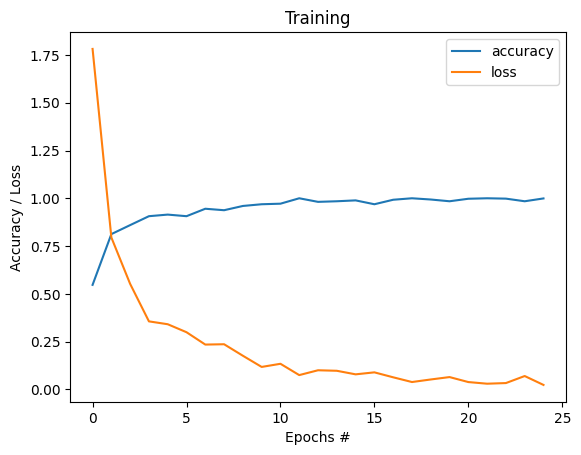

In [ ]:
# Plotting
hist = history.history

# Plot accuracy and loss
plt.plot(hist["accuracy"], label="accuracy")
plt.plot(hist["loss"], label="loss")




# Add the labels and legend
plt.title("Training")
plt.ylabel("Accuracy / Loss")
plt.xlabel("Epochs #")
plt.legend()

# Finally show the plot
plt.show()

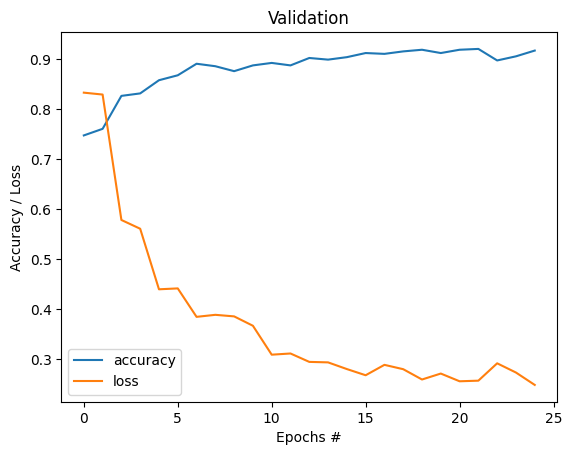

In [ ]:
# Plotting
hist = history.history

# Plot accuracy and loss
plt.plot(hist["val_accuracy"], label="accuracy")
plt.plot(hist["val_loss"], label="loss")




# Add the labels and legend
plt.title("Validation")
plt.ylabel("Accuracy / Loss")
plt.xlabel("Epochs #")
plt.legend()

# Finally show the plot
plt.show()

In [ ]:
import os

# Define the directory path
model_save_dir = '/content/drive/MyDrive/PlantDataSet/saved_models'

# Create the directory if it doesn't exist
if not os.path.exists(model_save_dir):
    os.makedirs(model_save_dir)

# Now save the model
model_save_path = os.path.join(model_save_dir, 'MobileNetV2.keras')
model.save(model_save_path)

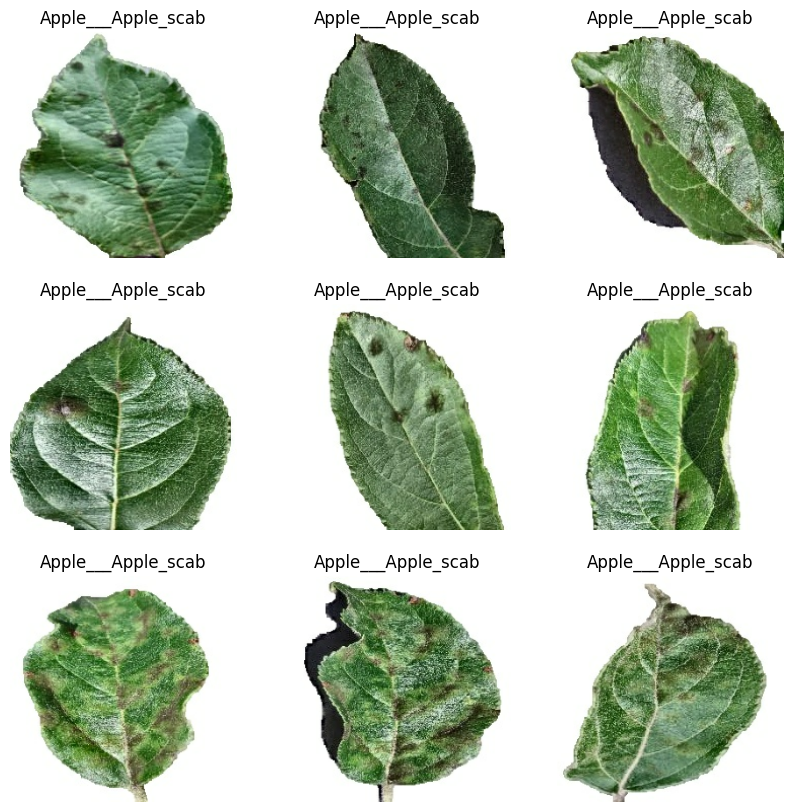

In [ ]:
fig = plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
fig.savefig('test_images.png', bbox_inches='tight', dpi=300)
plt.show()

Text(0.5, 1.0, 'Apple___Apple_scab')

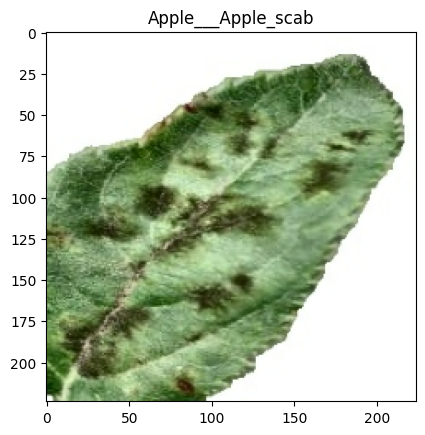

In [ ]:
X_test = []
Y_test = []
for images, labels in val_ds:
  for i in range(len(images)):
    X_test.append(images[i].numpy().astype("uint8"))
    Y_test.append(class_names[labels[i]])

plt.imshow(X_test[0])
plt.title(Y_test[0])

In [ ]:
len(X_test),len(Y_test)

(607, 607)

In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/PlantDataSet/saved_models/MobileNetV2.keras")
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)       │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenet_1.00_224 (Functional) │ (None, 7, 7, 1024)     │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         2,470 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,433,076 (13.10 MB)

 Trainable params: 68,070 (265.90 KB)

 Non-trainable params: 3,228,864 (12.32 MB)

 Optimizer params: 136,142 (531.81 KB)

In [ ]:
from tqdm import tqdm_notebook as tqdm
import pandas as pd
y_predictions = []
sureness= []
df = pd.DataFrame()

for i in tqdm(range(len(X_test))):
    predictions_val = model.predict(np.expand_dims(X_test[i], axis=0),verbose=False)
    predictions_val = predictions_val.reshape(38)
    label = np.argmax(predictions_val)
    y_predictions.append(class_names[label])
    sureness.append(predictions_val[label])

df["Y_true"] = Y_test
df["Y_prediction"] = y_predictions
df["Sureness"] = sureness

<ipython-input-27-73539b3f05cc>:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(len(X_test))):


  0%|          | 0/607 [00:00<?, ?it/s]

In [ ]:
df

,Y_true,Y_prediction,Sureness
0,Apple___Apple_scab,Apple___Apple_scab,0.998471
1,Apple___Apple_scab,Apple___Apple_scab,0.973556
2,Apple___Apple_scab,Apple___Apple_scab,0.967017
3,Apple___Apple_scab,Apple___Apple_scab,0.421589
4,Apple___Apple_scab,Apple___Apple_scab,0.437245
...,...,...,...
602,Tomato___healthy,Tomato___healthy,0.999442
603,Tomato___healthy,Tomato___healthy,0.966295
604,Tomato___healthy,Tomato___healthy,0.900258
605,Tomato___healthy,Tomato___Target_Spot,0.671109


In [ ]:
loss, accuracy = model.evaluate(test_ds)

19/19 ━━━━━━━━━━━━━━━━━━━━ 64s 3s/step - accuracy: 0.9231 - loss: 0.2179


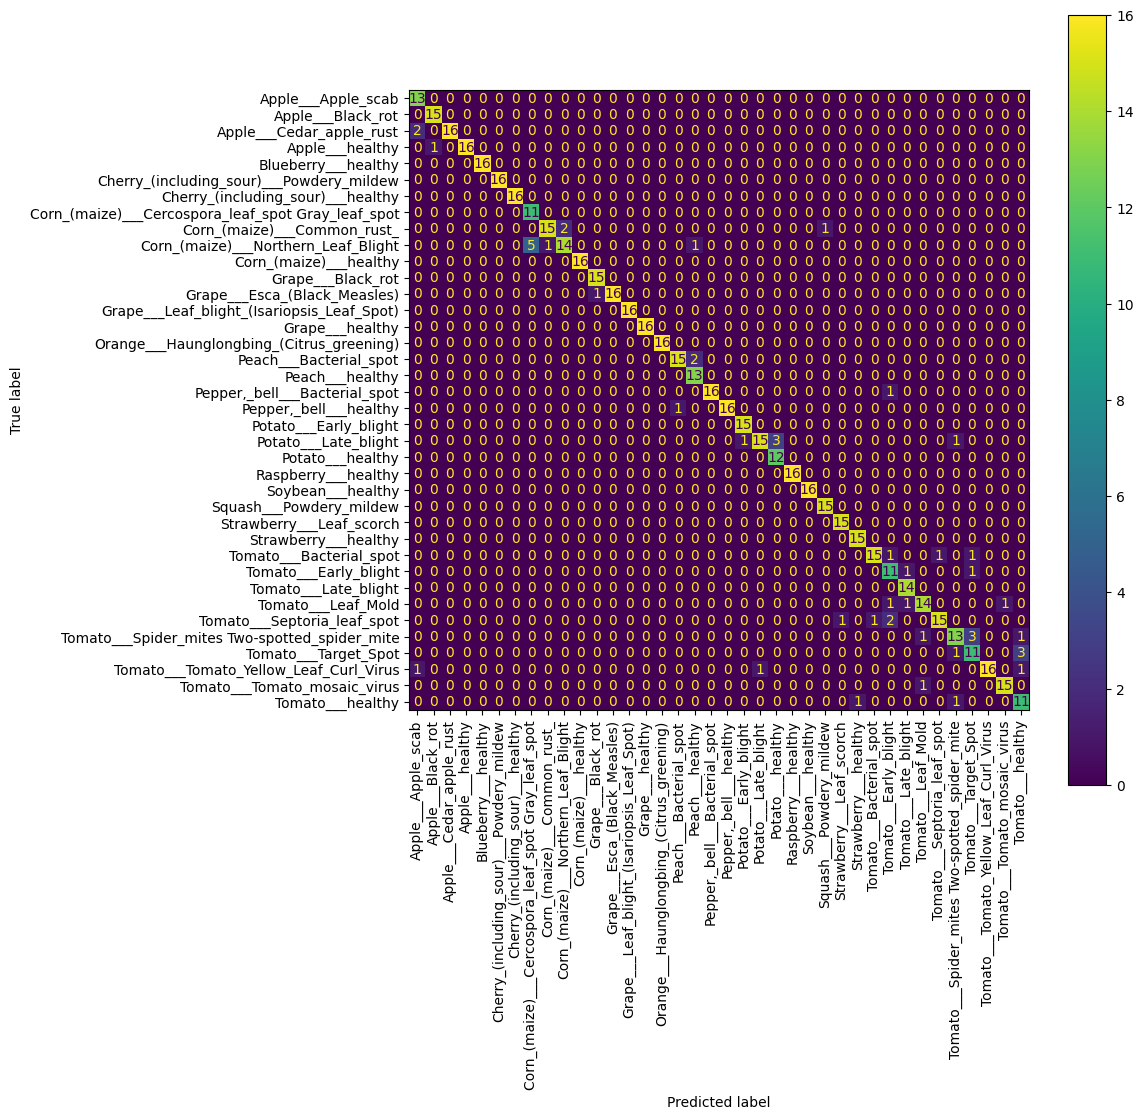

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
cm1=confusion_matrix(y_predictions,Y_test)
disp=ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=class_names)
fig, ax = plt.subplots(figsize=(10,10))

disp.plot(ax=ax);
plt.setp(ax.get_xticklabels(), rotation=90)
fig.savefig('valid_confusion_matrix_full_image3.png', bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
# def leaf_fills_border(image, threshold=0.85):
#     """
#     Determine if a leaf takes up most of the image border

#     Parameters:
#     -----------
#     image : numpy.ndarraya
#         Input image in RGB format
#     threshold : float
#         Percentage of border that must be leaf for it to be considered border-filling

#     Returns:
#     --------
#     bool
#         True if leaf occupies most of the border, False otherwise
#     """
#     # Convert to HSV for better color segmentation
#     hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

#     # Use wider range for green color in HSV (leaf color)
#     lower_green = np.array([20, 30, 30])
#     upper_green = np.array([100, 255, 255])

#     # Create mask for green pixels
#     green_mask = cv2.inRange(hsv, lower_green, upper_green)

#     # Extract just the border pixels
#     h, w = green_mask.shape[:2]
#     border_thickness = 5  # Thickness of the border to check

#     # Create a mask for the border region
#     border_mask = np.zeros_like(green_mask)
#     border_mask[0:border_thickness, :] = 255  # Top border
#     border_mask[h-border_thickness:h, :] = 255  # Bottom border
#     border_mask[:, 0:border_thickness] = 255  # Left border
#     border_mask[:, w-border_thickness:w] = 255  # Right border

#     # Count green pixels in the border
#     border_green_pixels = np.sum(cv2.bitwise_and(green_mask, border_mask) > 0)
#     total_border_pixels = np.sum(border_mask > 0)

#     # Calculate the percentage of border pixels that are green
#     border_green_percentage = border_green_pixels / total_border_pixels

#     # Return True if the percentage exceeds the threshold
#     return border_green_percentage > threshold

# def enhanced_leaf_extraction(image):
#     """
#     Extract leaf objects from green-dominant backgrounds that aren't close-ups

#     Parameters:
#     -----------
#     image : numpy.ndarray
#         Input image in RGB format

#     Returns:
#     --------
#     numpy.ndarray
#         Image with only the leaf objects preserved on white background
#     """
#     # Convert to HSV for better color segmentation
#     hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

#     # Create a more refined green range for leaves
#     # Narrower hue range to distinguish leaves from background foliage
#     leaf_green_lower = np.array([30, 40, 40])  # More saturated greens
#     leaf_green_upper = np.array([90, 255, 255])

#     # Create mask for leaf green pixels
#     leaf_mask = cv2.inRange(hsv, leaf_green_lower, leaf_green_upper)

#     # Apply morphological operations to clean up the mask
#     kernel = np.ones((3,3), np.uint8)
#     leaf_mask = cv2.morphologyEx(leaf_mask, cv2.MORPH_CLOSE, kernel, iterations=2)
#     leaf_mask = cv2.morphologyEx(leaf_mask, cv2.MORPH_OPEN, kernel, iterations=1)

#     # Find contours in the leaf mask
#     contours, _ = cv2.findContours(leaf_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#     # If no significant contours found, try different thresholds
#     if not contours or max(cv2.contourArea(c) for c in contours) < (image.shape[0] * image.shape[1] * 0.05):
#         # Try LAB color space for better leaf extraction
#         lab = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)

#         # Extract the 'a' channel (green-red axis)
#         a_channel = lab[:,:,1]

#         # Threshold to separate leaves (typically more green than background)
#         _, leaf_mask = cv2.threshold(a_channel, 128, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

#         # Clean up mask
#         leaf_mask = cv2.morphologyEx(leaf_mask, cv2.MORPH_CLOSE, kernel, iterations=3)
#         leaf_mask = cv2.morphologyEx(leaf_mask, cv2.MORPH_OPEN, kernel, iterations=1)

#         # Find contours again
#         contours, _ = cv2.findContours(leaf_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#     # Create a mask for all significant leaf contours
#     refined_mask = np.zeros_like(leaf_mask)

#     # Minimum contour area (adjust as needed)
#     min_area = image.shape[0] * image.shape[1] * 0.01  # 1% of image

#     if contours:
#         # Keep only significant contours
#         for contour in contours:
#             area = cv2.contourArea(contour)
#             if area > min_area:
#                 cv2.drawContours(refined_mask, [contour], -1, 255, -1)

#                 # Draw disease spots that are inside this contour
#                 x, y, w, h = cv2.boundingRect(contour)
#                 roi = image[y:y+h, x:x+w]

#                 # Apply disease spot detection on this ROI
#                 disease_mask = detect_disease_spots(roi)
#                 if disease_mask is not None:
#                     # Position the disease mask in the correct location
#                     refined_mask[y:y+h, x:x+w] = cv2.bitwise_or(
#                         refined_mask[y:y+h, x:x+w],
#                         disease_mask
#                     )

#     # Create output image with white background
#     white_bg = np.ones_like(image) * 255

#     # Convert mask to 3 channels
#     mask_3ch = cv2.merge([refined_mask, refined_mask, refined_mask]) / 255.0

#     # Combine leaf with white background
#     result = (image * mask_3ch + white_bg * (1 - mask_3ch)).astype(np.uint8)

#     return result

# def detect_disease_spots(roi):
#     """
#     Detect disease spots on leaves

#     Parameters:
#     -----------
#     roi : numpy.ndarray
#         Region of interest (cropped leaf)

#     Returns:
#     --------
#     numpy.ndarray or None
#         Mask of disease spots or None if none found
#     """
#     # Convert to HSV
#     hsv = cv2.cvtColor(roi, cv2.COLOR_RGB2HSV)

#     # Detect common disease colors (brown/reddish spots)
#     # Brown spots
#     lower_brown = np.array([10, 60, 20])
#     upper_brown = np.array([30, 255, 255])
#     brown_mask = cv2.inRange(hsv, lower_brown, upper_brown)

#     # Reddish spots
#     lower_red1 = np.array([0, 50, 50])
#     upper_red1 = np.array([10, 255, 255])
#     red_mask1 = cv2.inRange(hsv, lower_red1, upper_red1)

#     lower_red2 = np.array([160, 50, 50])
#     upper_red2 = np.array([180, 255, 255])
#     red_mask2 = cv2.inRange(hsv, lower_red2, upper_red2)

#     # Yellow spots
#     lower_yellow = np.array([20, 100, 100])
#     upper_yellow = np.array([40, 255, 255])
#     yellow_mask = cv2.inRange(hsv, lower_yellow, upper_yellow)

#     # Combine all disease masks
#     disease_mask = cv2.bitwise_or(brown_mask, red_mask1)
#     disease_mask = cv2.bitwise_or(disease_mask, red_mask2)
#     disease_mask = cv2.bitwise_or(disease_mask, yellow_mask)

#     # Clean the mask
#     kernel = np.ones((3,3), np.uint8)
#     disease_mask = cv2.morphologyEx(disease_mask, cv2.MORPH_CLOSE, kernel, iterations=1)
#     disease_mask = cv2.morphologyEx(disease_mask, cv2.MORPH_OPEN, kernel, iterations=1)

#     # Check if any disease spots were found
#     if np.sum(disease_mask) > 0:
#         return disease_mask
#     else:
#         return None

# def is_disease_spot(contour, image):
#     """
#     Determine if a contour is likely to be a disease spot rather than a hand or other object

#     Parameters:
#     -----------
#     contour : numpy.ndarray
#         Contour to analyze
#     image : numpy.ndarray
#         Original image

#     Returns:
#     --------
#     bool
#         True if the contour is likely a disease spot, False otherwise
#     """
#     # Disease spots are typically small and circular
#     area = cv2.contourArea(contour)
#     perimeter = cv2.arcLength(contour, True)

#     # Avoid division by zero
#     if perimeter == 0:
#         return False

#     # Calculate circularity: 4*pi*area/perimeter^2
#     # Perfect circle has circularity of 1
#     circularity = 4 * np.pi * area / (perimeter * perimeter)

#     # Calculate the bounding rectangle
#     x, y, w, h = cv2.boundingRect(contour)

#     # Check aspect ratio
#     aspect_ratio = float(w) / h if h > 0 else 0

#     # Check size relative to image
#     image_area = image.shape[0] * image.shape[1]
#     relative_size = area / image_area

#     # Disease spots are typically:
#     # 1. Small (less than 2% of image)
#     # 2. Relatively circular (circularity > 0.6)
#     # 3. Aspect ratio close to 1 (between 0.7 and 1.3)
#     is_small = relative_size < 0.02
#     is_circular = circularity > 0.6
#     has_good_aspect = 0.7 < aspect_ratio < 1.3

#     return is_small and (is_circular or has_good_aspect)

# def remove_background(image, config=None):
#     """
#     Remove background using rembg with enhanced parameters and segment the main leaf.

#     Parameters:
#     -----------
#     image : numpy.ndarray
#         Input image to process in RGB format
#     config : dict, optional
#         Preprocessing configuration

#     Returns:
#     --------
#     numpy.ndarray
#         Processed image with the background removed and focused on the main leaf
#     """
#     try:

#         # Check if the image is predominantly green (likely a close-up of a leaf)
#         hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
#         lower_green = np.array([20, 30, 30])
#         upper_green = np.array([100, 255, 255])
#         green_mask = cv2.inRange(hsv, lower_green, upper_green)
#         green_percentage = np.sum(green_mask > 0) / (image.shape[0] * image.shape[1])

#         # If image is almost entirely green (>90%), skip rembg and just use color thresholding
#         if green_percentage > 0.95:
#             # Create a mask from green pixels
#             kernel = np.ones((5,5), np.uint8)
#             refined_mask = cv2.morphologyEx(green_mask, cv2.MORPH_CLOSE, kernel)

#             # Convert the single channel mask to a 3-channel mask
#             refined_mask_3 = cv2.merge([refined_mask, refined_mask, refined_mask])
#             mask_norm = refined_mask_3.astype(np.float32) / 255.0

#             # Create a white background image
#             white_background = np.ones_like(image, dtype=np.uint8) * 255

#             # Composite the image using the mask
#             final_image = (image * mask_norm + white_background * (1 - mask_norm)).astype(np.uint8)
#             return final_image

#         # For regular images, use rembg with carefully tuned parameters
#         image_copy = image.copy()

#         # Remove background with more conservative settings to avoid cutting the leaf
#         output = remove(
#             image_copy,
#             alpha_matting=True,
#             alpha_matting_foreground_threshold=240,  # Higher threshold to include more of the leaf
#             alpha_matting_background_threshold=10,   # Lower threshold for better background separation
#             alpha_matting_erode_size=5,             # Reduced erosion to preserve leaf edges
#             post_process_mask=True
#         )

#         # Separate RGB and alpha channels
#         output_rgb = output[:, :, :3]
#         alpha_channel = output[:, :, 3]

#         # If alpha channel is empty (all zeros), fall back to color-based segmentation
#         if np.max(alpha_channel) == 0:
#             # Create a white background image
#             white_background = np.ones_like(image, dtype=np.uint8) * 255

#             # Use the green mask from earlier
#             mask_norm = cv2.merge([green_mask, green_mask, green_mask]).astype(np.float32) / 255.0

#             # Composite the image
#             final_image = (image * mask_norm + white_background * (1 - mask_norm)).astype(np.uint8)
#             return final_image

#         # Threshold the alpha channel to create a binary mask with a lower threshold to keep more of the leaf
#         _, binary_mask = cv2.threshold(alpha_channel, 50, 255, cv2.THRESH_BINARY)

#         # Apply morphological operations to clean up the mask
#         kernel = np.ones((3,3), np.uint8)
#         binary_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_CLOSE, kernel, iterations=2)

#         # Find contours in the binary mask
#         contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#         if len(contours) == 0:
#             # If no contours found, use the original binary mask
#             refined_mask = binary_mask
#         else:
#             # Find the largest contour by area
#             largest_contour = max(contours, key=cv2.contourArea)

#             # Create a refined mask from the largest contour
#             refined_mask = np.zeros_like(binary_mask)
#             cv2.drawContours(refined_mask, [largest_contour], -1, color=255, thickness=-1)

#             # If there are other contours that are disease spots, preserve them
#             for contour in contours:
#                 if contour is not largest_contour and is_disease_spot(contour, image):
#                     cv2.drawContours(refined_mask, [contour], -1, color=255, thickness=-1)

#         # Convert the single channel mask to a 3-channel mask
#         refined_mask_3 = cv2.merge([refined_mask, refined_mask, refined_mask])
#         mask_norm = refined_mask_3.astype(np.float32) / 255.0

#         # Create a white background image
#         white_background = np.ones_like(output_rgb, dtype=np.uint8) * 255

#         # Composite the output_rgb using the refined mask
#         final_image = (output_rgb * mask_norm + white_background * (1 - mask_norm)).astype(np.uint8)

#         return final_image
#     except Exception as e:
#         print(f"Background removal error: {e}")
#         # On failure, return the original image but with increased contrast
#         return enhance_contrast(image.copy())

# def preprocess_image(image_path, config=None):
#     """
#     Full preprocessing pipeline for a single image

#     Parameters:
#     -----------
#     image_path : str
#         Path to input image
#     config : dict, optional
#         Preprocessing configuration

#     Returns:
#     --------
#     numpy.ndarray
#         Preprocessed image ready for neural network input
#     """
#     # Use default configuration if not provided
#     if config is None:
#         config = initialize_preprocessor()

#     try:
#         # Read the image in BGR and convert to RGB
#         image = cv2.imread(image_path)
#         if image is None:
#             raise ValueError(f"Could not read image: {image_path}")
#         image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#         # Check if leaf fills border
#         border_filled = leaf_fills_border(image)

#         # Process based on image characteristics
#         if border_filled:
#             # For border-filling leaves, enhance contrast but keep the original content
#             enhanced_image = enhance_contrast(image)
#         else:
#             # Remove the background and segment the leaf
#             no_bg_image = remove_background(image)

#             # Check if the result is mostly empty (failed segmentation)
#             non_white_pixels = np.sum(no_bg_image < 250) / no_bg_image.size
#             if non_white_pixels < 0.01:  # If less than 1% non-white pixels
#                 enhanced_image = enhance_contrast(image)  # Fall back to original image
#             else:
#                 enhanced_image = enhance_contrast(no_bg_image)

#         # Resize with padding
#         final_image = resize_with_padding(enhanced_image, config)

#         # Normalize image for neural network input (values between 0 and 1)
#         normalized_image = final_image.astype(np.float32) / 255.0

#         return normalized_image

#     except Exception as e:
#         print(f"Preprocessing error for {image_path}: {e}")
#         # In case of any error, attempt basic preprocessing
#         try:
#             # Read and resize the image
#             image = cv2.imread(image_path)
#             image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#             image = cv2.resize(image, config['target_size'])
#             return image.astype(np.float32) / 255.0
#         except:
#             # If all else fails, return zeros with the right shape
#             return np.zeros((*config['target_size'], 3), dtype=np.float32)

# def initialize_preprocessor(target_size=(224, 224)):
#     """
#     Initialize preprocessing configuration

#     Parameters:
#     -----------
#     target_size : tuple, optional
#         Desired output image size (width, height). Default is (224, 224)

#     Returns:
#     --------
#     dict
#         Configuration dictionary for preprocessing
#     """
#     return {
#         'target_size': target_size
#     }

# def enhance_contrast(image):
#     """
#     Enhance image contrast using CLAHE

#     Parameters:
#     -----------
#     image : numpy.ndarray
#         Input image to enhance

#     Returns:
#     --------
#     numpy.ndarray
#         Contrast-enhanced image
#     """
#     # Convert to YCrCb color space
#     image_ycrcb = cv2.cvtColor(image, cv2.COLOR_RGB2YCR_CB)

#     # Split channels
#     y_channel, cr_channel, cb_channel = cv2.split(image_ycrcb)

#     # Apply CLAHE to luminance channel
#     clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
#     y_enhanced = clahe.apply(y_channel)

#     # Merge channels back
#     enhanced = cv2.merge([y_enhanced, cr_channel, cb_channel])
#     enhanced = cv2.cvtColor(enhanced, cv2.COLOR_YCR_CB2RGB)

#     return enhanced

# def resize_with_padding(image, config):
#     """
#     Resize image to target size while preserving aspect ratio with padding

#     Parameters:
#     -----------
#     image : numpy.ndarray
#         Input image to resize
#     config : dict
#         Configuration dictionary containing target_size

#     Returns:
#     --------
#     numpy.ndarray
#         Resized image with padding
#     """
#     target_size = config['target_size']
#     h, w = image.shape[:2]
#     target_h, target_w = target_size

#     # Calculate scaling factor to maintain aspect ratio
#     scale = min(target_h / h, target_w / w)

#     # Calculate new dimensions
#     new_h, new_w = int(h * scale), int(w * scale)

#     # Resize the image
#     resized = cv2.resize(image, (new_w, new_h))

#     # Create a white canvas of target size
#     canvas = np.ones((target_h, target_w, 3), dtype=np.uint8) * 255

#     # Calculate offsets for centering
#     offset_h = (target_h - new_h) // 2
#     offset_w = (target_w - new_w) // 2

#     # Place the resized image on the canvas
#     canvas[offset_h:offset_h + new_h, offset_w:offset_w + new_w] = resized

#     return canvas

In [ ]:

"""
first the target size is initialized
"""


def initialize_preprocessor(target_size=(224, 224)):
    """
    Initialize preprocessing configuration

    Parameters:
    -----------
    target_size : tuple, optional
        Desired output image size (width, height). Default is (224, 224)

    Returns:
    --------
    dict
        Configuration dictionary for preprocessing
    """
    return {
        'target_size': target_size
    }


def remove_background(image, config=None):
    """
    Remove background using rembg with enhanced parameters and segment the main leaf.

    Parameters:
    -----------
    image : numpy.ndarray
        Input image to process in RGB format
    config : dict, optional
        Preprocessing configuration

    Returns:
    --------
    numpy.ndarray
        Processed image with the background removed and focused on the main leaf
    """
    try:

        # Check if the image is predominantly green (likely a close-up of a leaf)
        hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
        lower_green = np.array([20, 30, 30])
        upper_green = np.array([100, 255, 255])
        green_mask = cv2.inRange(hsv, lower_green, upper_green)
        green_percentage = np.sum(green_mask > 0) / (image.shape[0] * image.shape[1])

        # If image is almost entirely green (>90%), skip rembg
        if green_percentage > 0.9999:
            final_image = image.copy()
            return final_image

        # For regular images, use rembg with carefully tuned parameters
        image_copy = image.copy()

        # Remove background with more conservative settings to avoid cutting the leaf
        output = remove(
            image_copy,
            alpha_matting=True,
            alpha_matting_foreground_threshold=240,  # Higher threshold to include more of the leaf
            alpha_matting_background_threshold=10,   # Lower threshold for better background separation
            alpha_matting_erode_size=5,             # Reduced erosion to preserve leaf edges
            post_process_mask=True
        )

        """
        the output of the rembg function has an alpha channel
        the model needs an rbg image the following steps seperates the rgn from the alpha
        and finds the leaf edge and adds it to the white background
        """

        # Separate RGB and alpha channels
        output_rgb = output[:, :, :3]
        alpha_channel = output[:, :, 3]


        # Threshold the alpha channel to create a binary mask with a lower threshold to keep more of the leaf
        _, binary_mask = cv2.threshold(alpha_channel, 50, 255, cv2.THRESH_BINARY)

        # Apply morphological operations to clean up the mask
        kernel = np.ones((3, 3), np.uint8)
        binary_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_CLOSE, kernel, iterations=2)

        # Find contours in the binary mask
        contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        if len(contours) == 0:
            # If no contours found, use the original binary mask
            refined_mask = binary_mask
        else:
            # Find the largest contour by area
            largest_contour = max(contours, key=cv2.contourArea)

            # Create a refined mask from the largest contour
            refined_mask = np.zeros_like(binary_mask)
            cv2.drawContours(refined_mask, [largest_contour], -1, color=255, thickness=-1)

            # If there are other contours that are disease spots, preserve them
            for contour in contours:
                if contour is not largest_contour:
                    cv2.drawContours(refined_mask, [contour], -1, color=255, thickness=-1)

        # Convert the single channel mask to a 3-channel mask
        refined_mask_3 = cv2.merge([refined_mask, refined_mask, refined_mask])
        mask_norm = refined_mask_3.astype(np.float32) / 255.0

        # Create a white background image
        white_background = np.ones_like(output_rgb, dtype=np.uint8) * 255

        # Composite the output_rgb using the refined mask
        final_image = (output_rgb * mask_norm + white_background * (1 - mask_norm)).astype(np.uint8)

        return final_image
    except Exception as e:
        print(f"Background removal error: {e}")
        # On failure, return the original image but with increased contrast
        return enhance_contrast(image.copy())





def enhance_contrast(image):
    """
    Enhance image contrast using CLAHE

    Parameters:
    -----------
    image : numpy.ndarray
        Input image to enhance

    Returns:
    --------
    numpy.ndarray
        Contrast-enhanced image
    """
    # Convert to YCrCb color space
    image_ycrcb = cv2.cvtColor(image, cv2.COLOR_RGB2YCR_CB)

    # Split channels
    y_channel, cr_channel, cb_channel = cv2.split(image_ycrcb)

    # Apply CLAHE to luminance channel
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    y_enhanced = clahe.apply(y_channel)

    # Merge channels back
    enhanced = cv2.merge([y_enhanced, cr_channel, cb_channel])
    enhanced = cv2.cvtColor(enhanced, cv2.COLOR_YCR_CB2RGB)

    return enhanced


def resize_with_padding(image, config):
    """
    Resize image to target size while preserving aspect ratio with padding

    Parameters:
    -----------
    image : numpy.ndarray
        Input image to resize
    config : dict
        Configuration dictionary containing target_size

    Returns:
    --------
    numpy.ndarray
        Resized image with padding
    """
    target_size = config['target_size']
    h, w = image.shape[:2]
    target_h, target_w = target_size

    # Calculate scaling factor to maintain aspect ratio
    scale = min(target_h / h, target_w / w)

    # Calculate new dimensions
    new_h, new_w = int(h * scale), int(w * scale)

    # Resize the image
    resized = cv2.resize(image, (new_w, new_h))

    # Create a white canvas of target size
    canvas = np.ones((target_h, target_w, 3), dtype=np.uint8) * 255

    # Calculate offsets for centering
    offset_h = (target_h - new_h) // 2
    offset_w = (target_w - new_w) // 2

    # Place the resized image on the canvas
    canvas[offset_h:offset_h + new_h, offset_w:offset_w + new_w] = resized

    return canvas


def preprocess_image(image_path, config=None):
    """
    Full preprocessing pipeline for a single image

    Parameters:
    -----------
    image_path : str
        Path to input image
    config : dict, optional
        Preprocessing configuration

    Returns:
    --------
    numpy.ndarray
        Preprocessed image ready for neural network input
    """
    # Use default configuration if not provided
    if config is None:
        config = initialize_preprocessor()

    try:
        # Read the image in BGR and convert to RGB
        image = cv2.imread(image_path)
        if image is None:
            raise ValueError(f"Could not read image: {image_path}")
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Remove the background and segment the leaf
        no_bg_image = remove_background(image)

        # Check if the result is mostly empty (failed segmentation
        non_white_pixels = np.sum(no_bg_image < 250) / no_bg_image.size
        print(non_white_pixels)
        if non_white_pixels < 0.01:  # If less than 1% non-white pixels
            enhanced_image = enhance_contrast(image)  # Fall back to original image
        else:
            print("in hear")
            enhanced_image = enhance_contrast(no_bg_image)

        # Resize with padding
        final_image = resize_with_padding(enhanced_image, config)

        # Normalize image for neural network input (values between 0 and 1)
        normalized_image = final_image.astype(np.float32) / 255.0

        return normalized_image

    except Exception as e:
        print(f"Preprocessing error for {image_path}: {e}")
        # In case of any error, attempt basic preprocessing
        try:
            # Read and resize the image
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, config['target_size'])
            return image.astype(np.float32) / 255.0
        except:
            # If all else fails, return zeros with the right shape
            return np.zeros((*config['target_size'], 3), dtype=np.float32)


In [ ]:
import glob
from google.colab import drive

drive.mount('/content/drive')
image_folder_path = '/content/drive/MyDrive/Leaf_Images'
image_files = glob.glob(os.path.join(image_folder_path, '*.jpeg'))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


100%|████████████████████████████████████████| 176M/176M [00:00<00:00, 119GB/s]


0.7601655903295248
in hear
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239

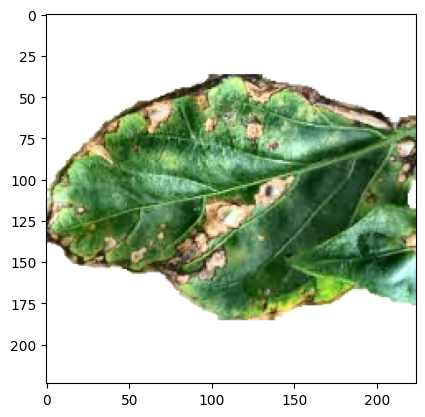

In [ ]:
img = preprocess_image("/content/drive/MyDrive/PlantDataSet/pepperbacterial.jpg")
img = (img * 255).astype(np.uint8)
print(np.unique(img))
plt.imshow(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

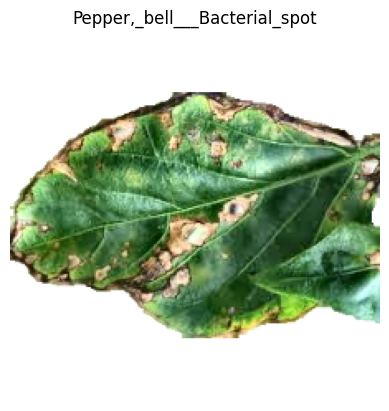

In [ ]:
input_image = np.expand_dims(img, axis=0)
prediction = model.predict(input_image)
prediction = prediction.reshape(38)
label = np.argmax(prediction)
plt.imshow(img)
plt.title(class_names[label])
plt.axis('off')

/content/drive/MyDrive/Leaf_Images/WhatsApp Image 2025-03-04 at 22.37.51.jpeg
0.3087451171875
in hear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


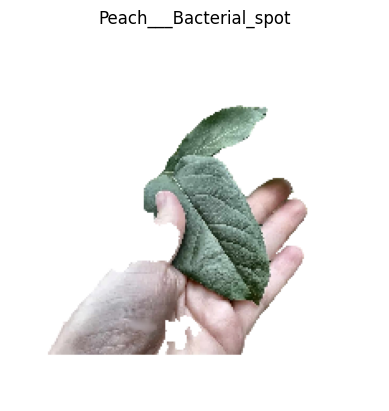

/content/drive/MyDrive/Leaf_Images/WhatsApp Image 2025-03-04 at 22.37.52 (1).jpeg
0.33037079510703365
in hear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


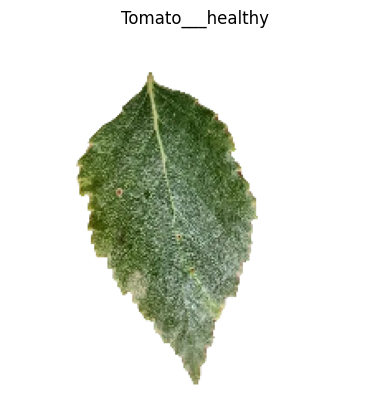

/content/drive/MyDrive/Leaf_Images/WhatsApp Image 2025-03-04 at 22.37.53.jpeg
0.3087451171875
in hear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


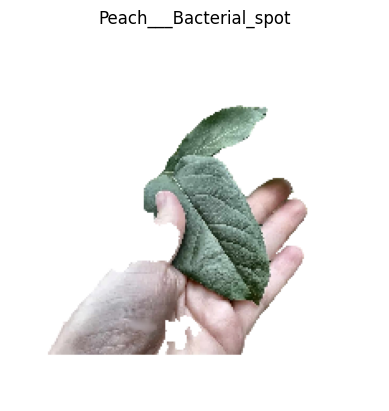

/content/drive/MyDrive/Leaf_Images/WhatsApp Image 2025-03-04 at 22.37.50.jpeg
0.48987848608101775
in hear
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 711ms/step


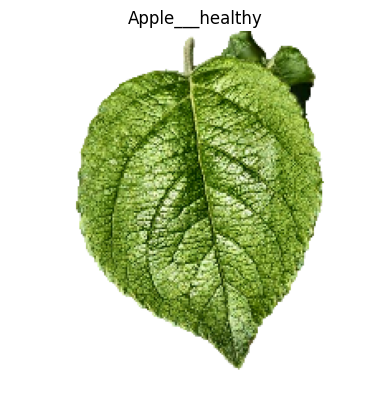

/content/drive/MyDrive/Leaf_Images/WhatsApp Image 2025-03-04 at 22.37.52.jpeg
0.6280381944444444
in hear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


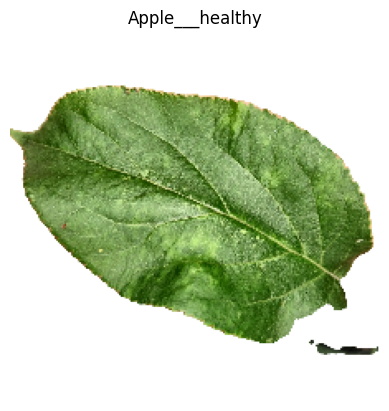

/content/drive/MyDrive/Leaf_Images/WhatsApp Image 2025-03-04 at 22.37.53 (1).jpeg
0.6138344226579521
in hear
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 671ms/step


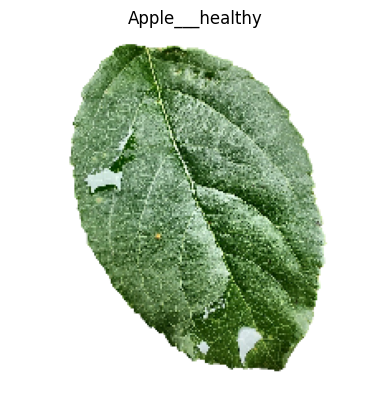

/content/drive/MyDrive/Leaf_Images/WhatsApp Image 2025-03-04 at 22.37.50 (1).jpeg
0.08966945939334638
in hear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


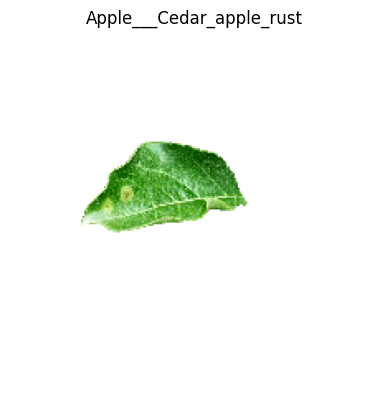

/content/drive/MyDrive/Leaf_Images/WhatsApp Image 2025-03-04 at 22.41.09.jpeg
0.4490218347010551
in hear
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 753ms/step


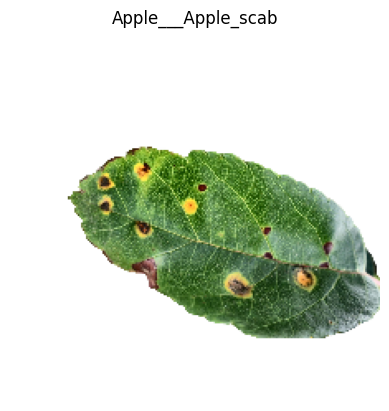

/content/drive/MyDrive/Leaf_Images/WhatsApp Image 2025-03-04 at 22.41.08 (1).jpeg
0.1874994994994995
in hear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


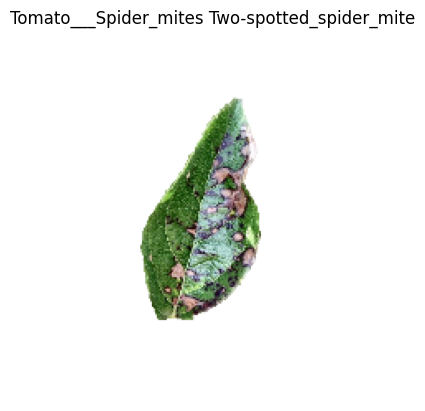

/content/drive/MyDrive/Leaf_Images/WhatsApp Image 2025-03-04 at 22.41.08.jpeg
0.19447127186099106
in hear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


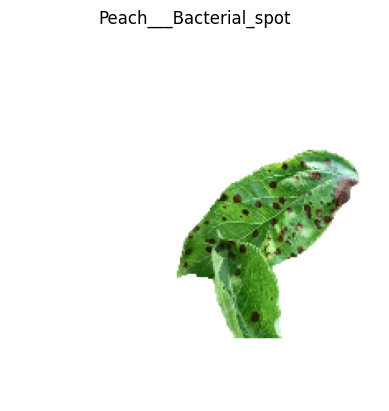

/content/drive/MyDrive/Leaf_Images/WhatsApp Image 2025-03-04 at 22.40.23.jpeg
0.5155295414462081
in hear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


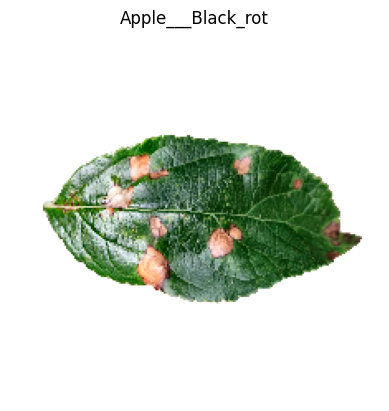

In [ ]:
for image_file in image_files:
    print(image_file)
    plt.figure()
    model_input = preprocess_image(image_file)
    model_input = np.expand_dims(model_input, axis=0)
    model_input = (model_input * 255).astype(np.uint8)
    prediction = model.predict(model_input)
    plt.imshow(model_input[0])
    plt.title(class_names[np.argmax(prediction)])
    plt.axis('off')
    plt.show()